In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from IPython.core.display import display, HTML

In [2]:
# display 설정
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [181]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize': 15}
pylab.rcParams.update(params)

In [5]:
with open('../dataset/BIGCON_DATA_ver1.2/CJ_DATA.bin', 'rb') as f:
    cj = pickle.load(f)

with open('../dataset/BIGCON_DATA_ver1.2/GS_DATA.bin', 'rb') as f:
    gs = pickle.load(f)
    
with open('../dataset/BIGCON_DATA_ver1.2/SH_DATA.bin', 'rb') as f:
    sh = pickle.load(f)
    
with open('../dataset/BIGCON_DATA_ver1.2/SK_DATA.bin', 'rb') as f:
    sk = pickle.load(f)
    
with open('../dataset/BIGCON_DATA_ver1.2/WS_DATA.bin', 'rb') as f:
    ws = pickle.load(f)

In [6]:
print(cj.keys())
print('-'*80)
print(gs.keys())
print('-'*80)
print(sh.keys())
print('-'*80)
print(sk.keys())
print('-'*80)
print(ws.keys())

dict_keys(['CJ_DATA', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['GS_TOTAL', 'GS_CATEGORY', 'GS_DONG', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['SH_RESIDENT', 'SH_FOREIGN', 'INDUSTRY_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['SK_AGE', 'SK_TIME', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['WS_MENTION', 'WS_SENTIMENT', 'WS_TOPIC', 'COL_CHANGE_DICT', 'INDUSTRY_CODE_DICT', 'GEO_CODE_DICT'])


In [7]:
# cj data
cj_data= cj['CJ_DATA']

# gs data
gs_total_data= gs['GS_TOTAL']
gs_category_data= gs['GS_CATEGORY']
gs_dong_data= gs['GS_DONG']

# sh data
sh_resident_data= sh['SH_RESIDENT']
sh_foreign_data= sh['SH_FOREIGN']

# sk data
sk_age_data= sk['SK_AGE']
sk_time_data= sk['SK_TIME']

# ws data
ws_mention_data= ws['WS_MENTION']
ws_sentiment_data= ws['WS_SENTIMENT']
ws_topic_data= ws['WS_TOPIC']

In [8]:
# seaborn 폰트 설정
sns.set(style= 'whitegrid', rc= {'figure.figsize': (10,10)},
       font= font_name)

# SH_DATA

In [9]:
sh_resident_gb= sh_resident_data.groupby('YEAR')

In [186]:
sh_gb2[sh_gb2.INDUSTRY_CODE == 42]['USE_AMT']

11    107981622
34     60570614
Name: USE_AMT, dtype: int64

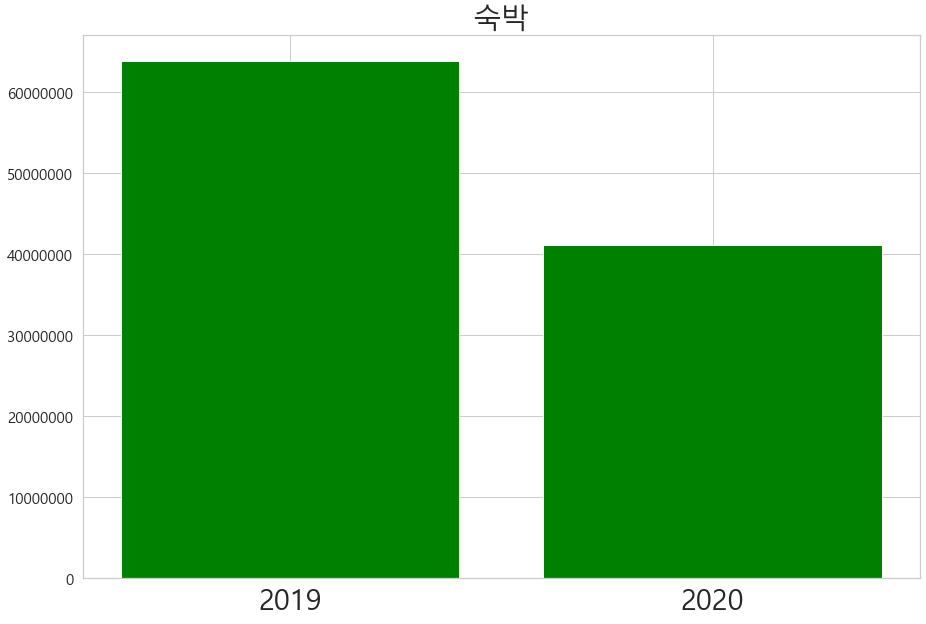

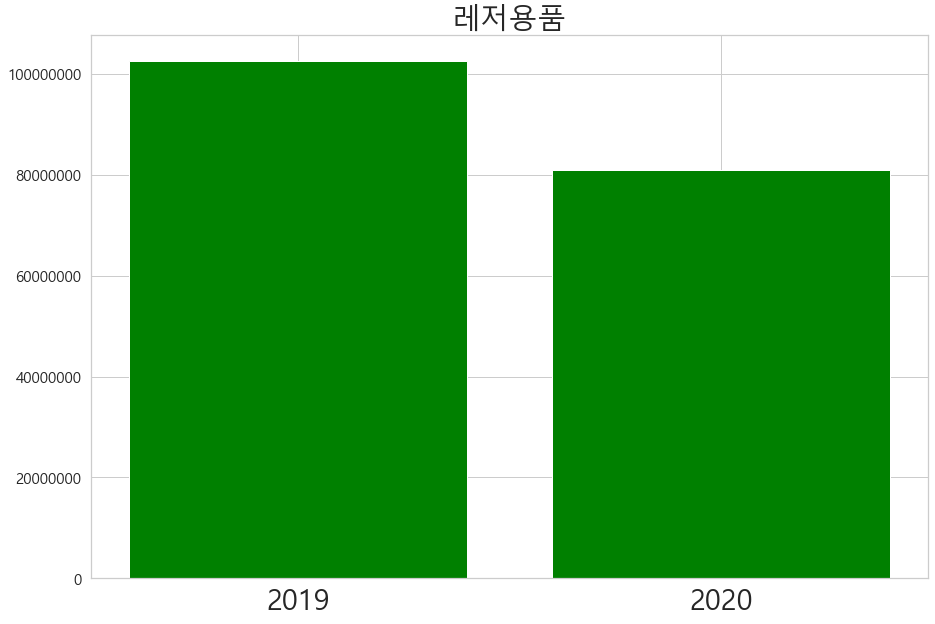

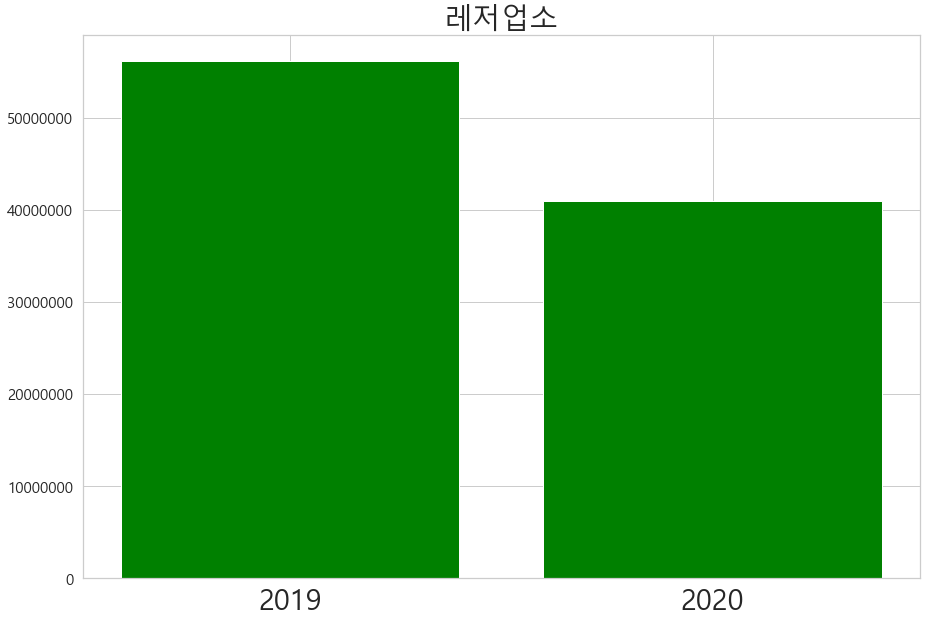

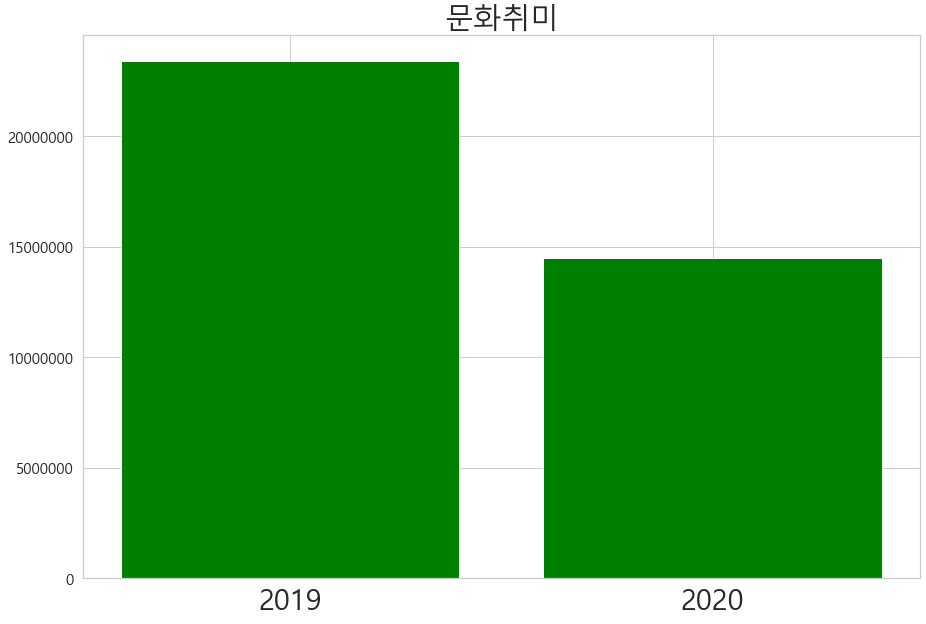

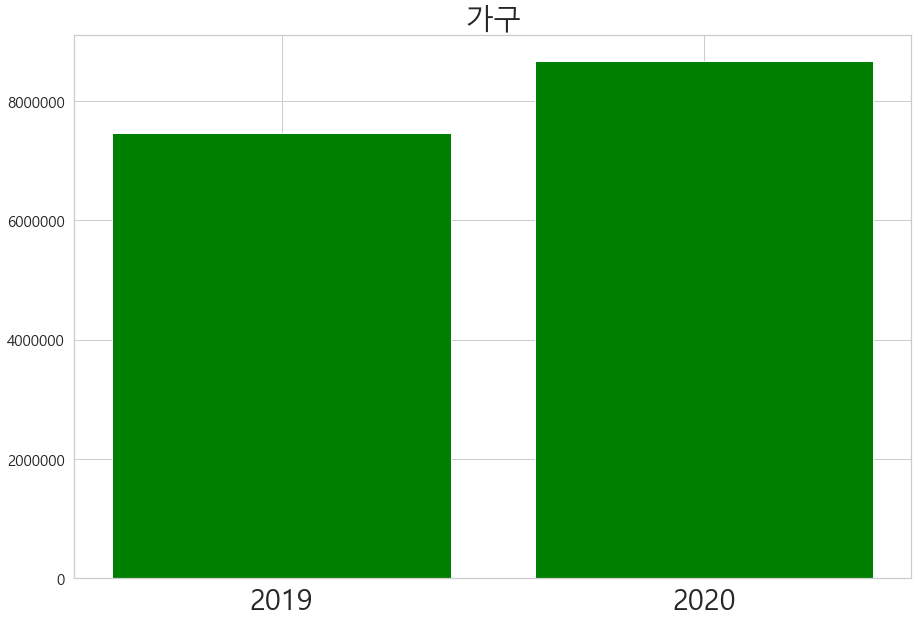

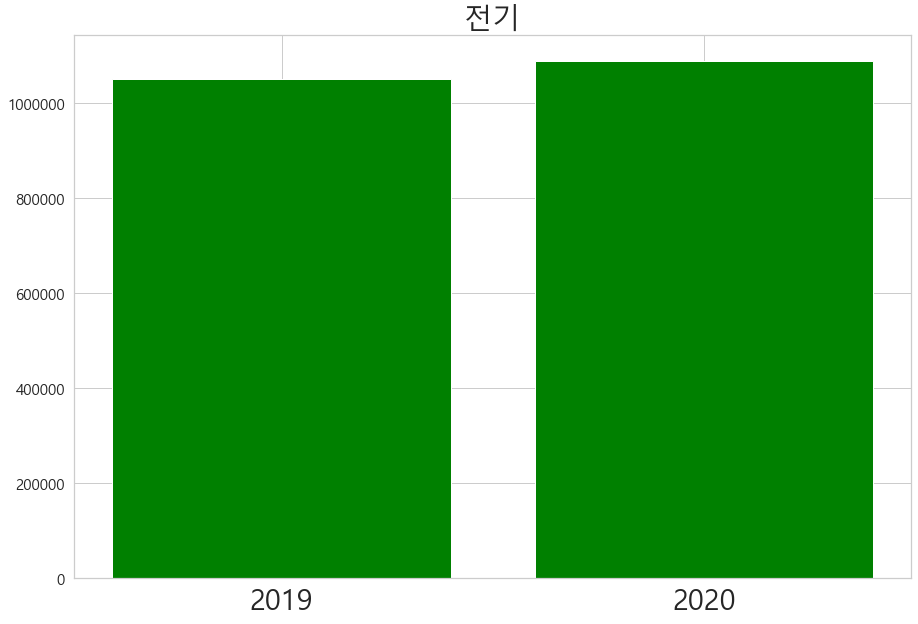

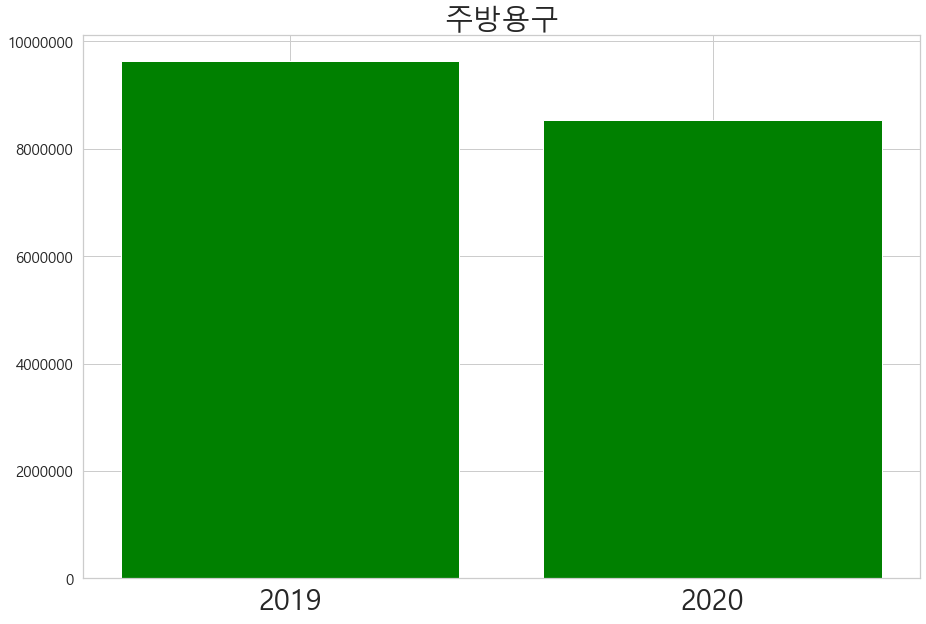

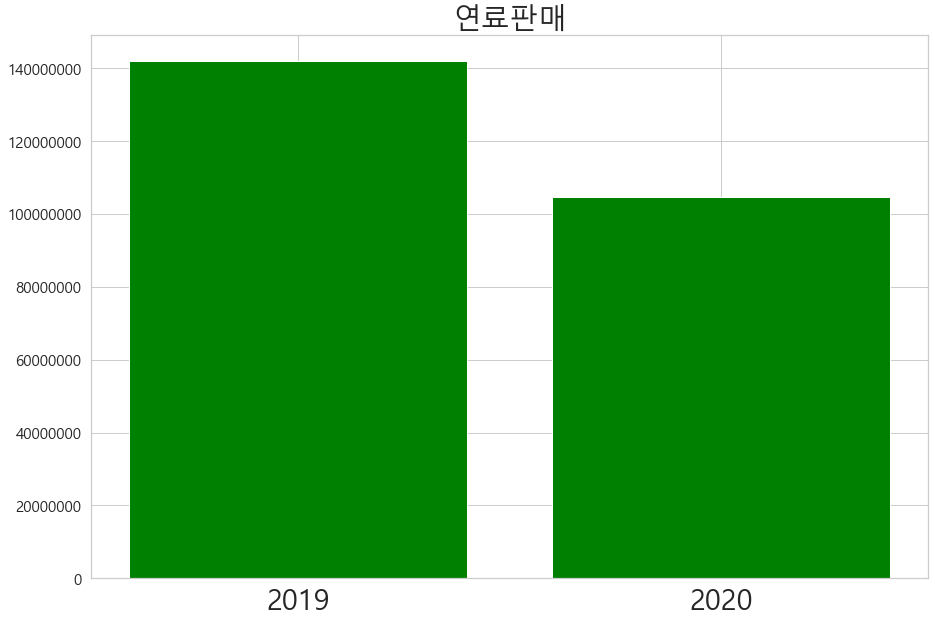

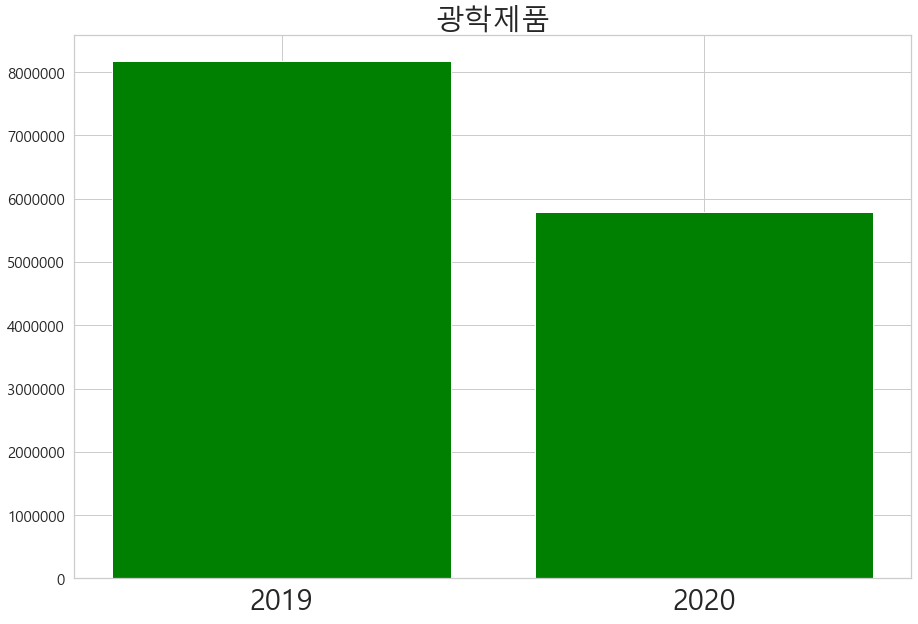

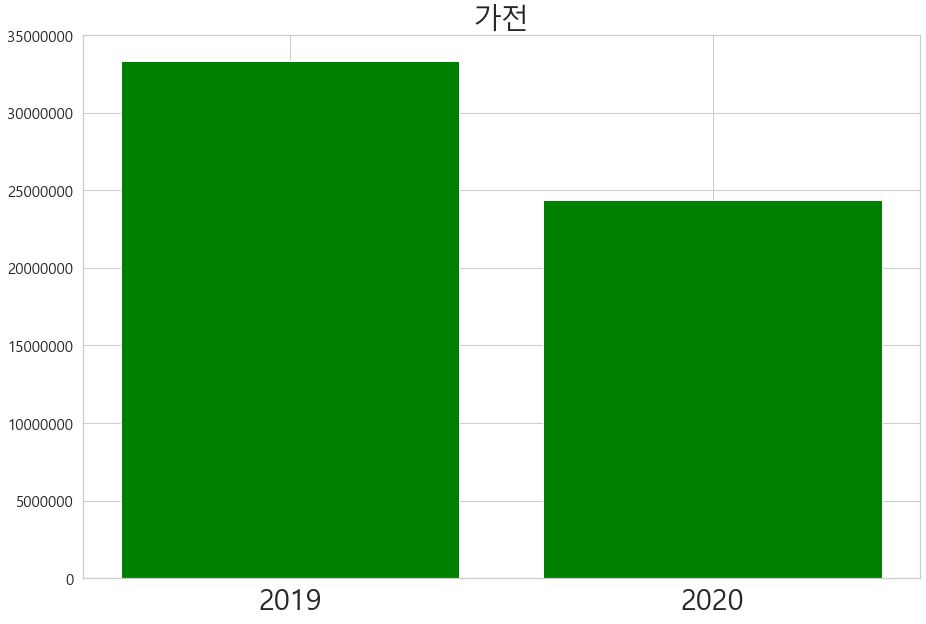

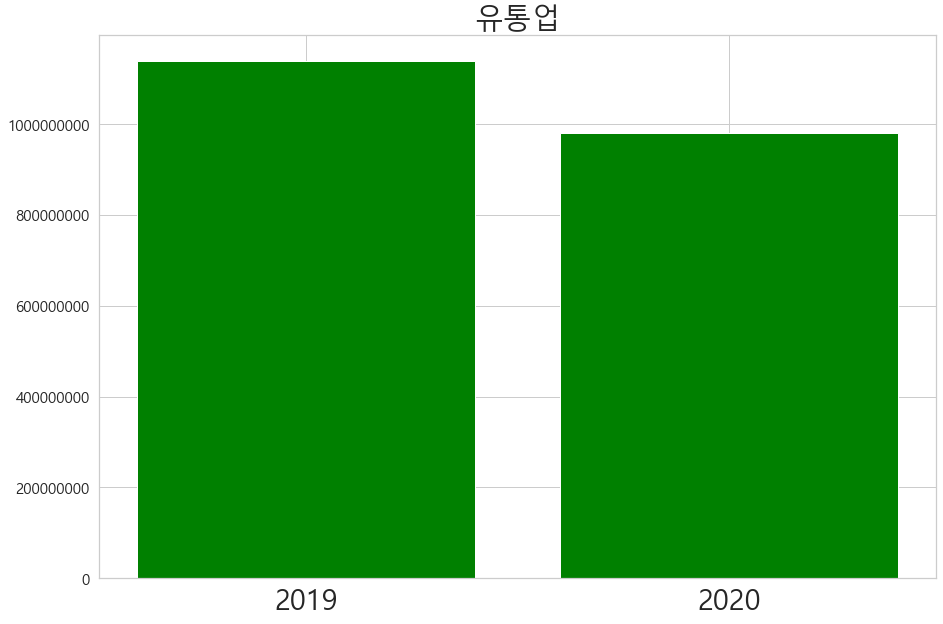

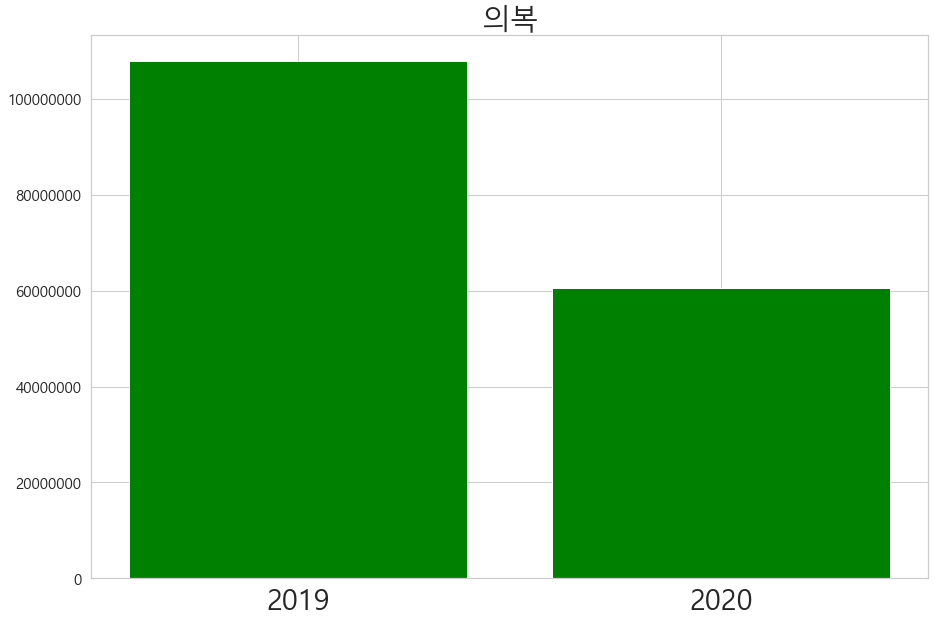

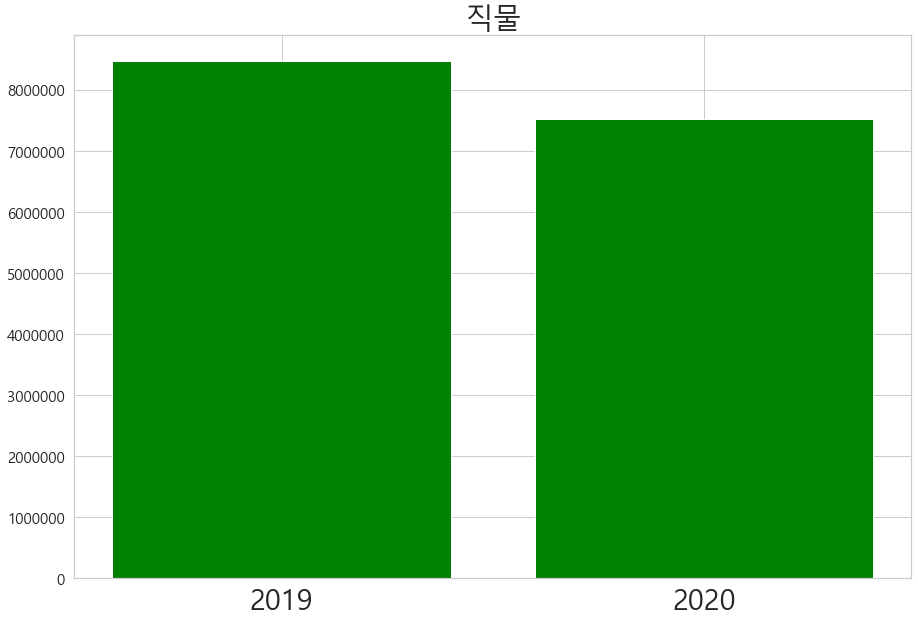

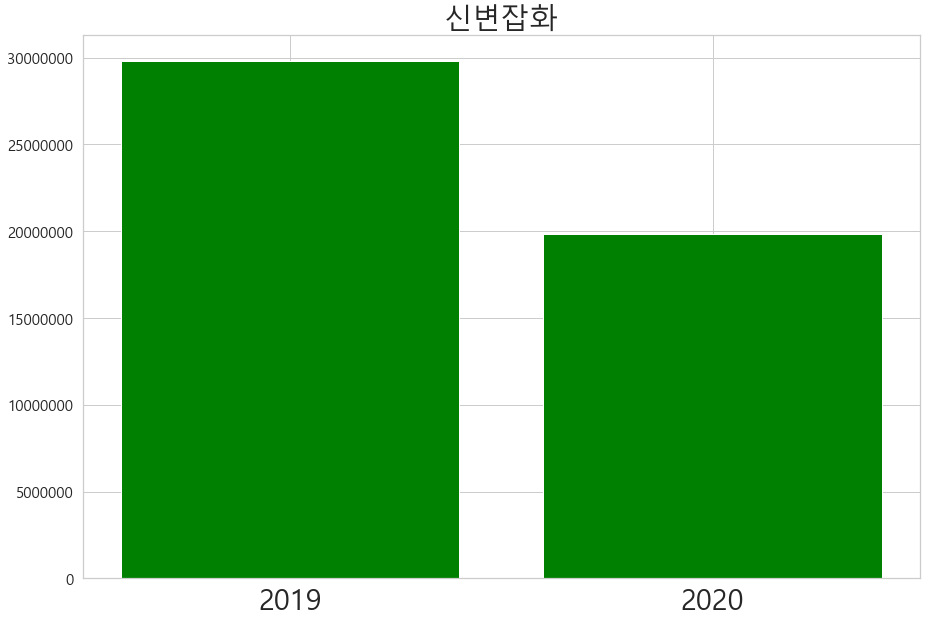

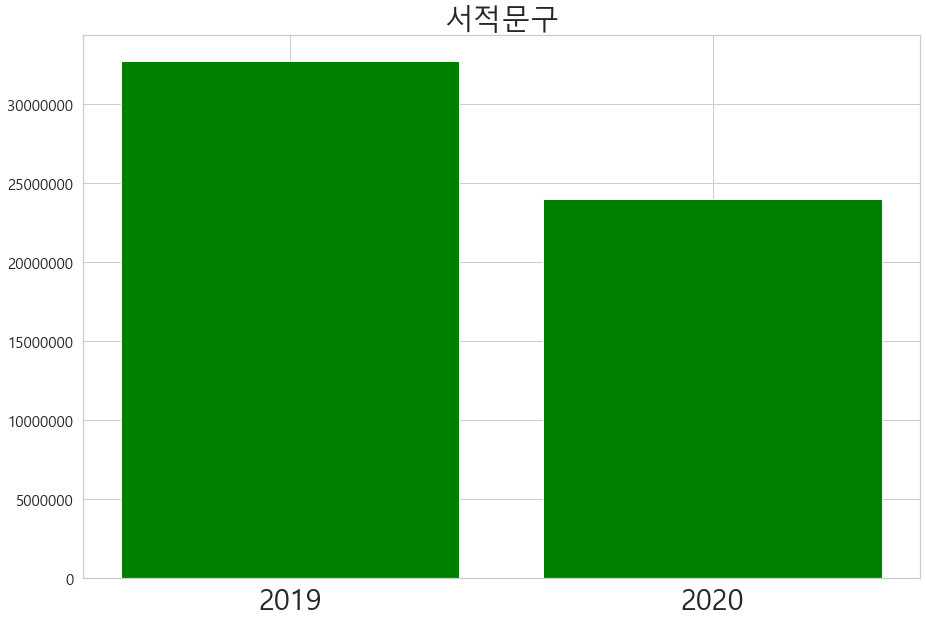

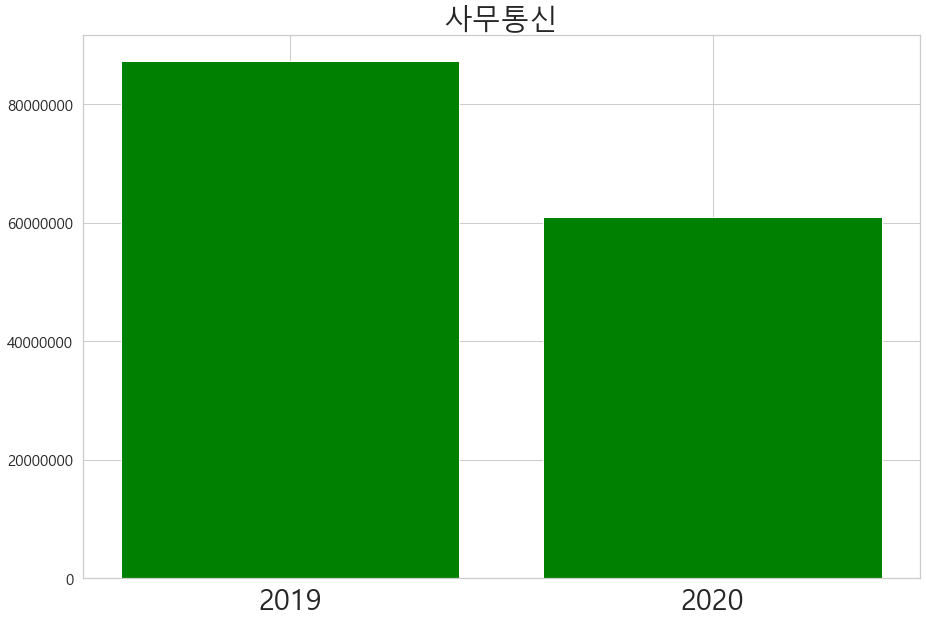

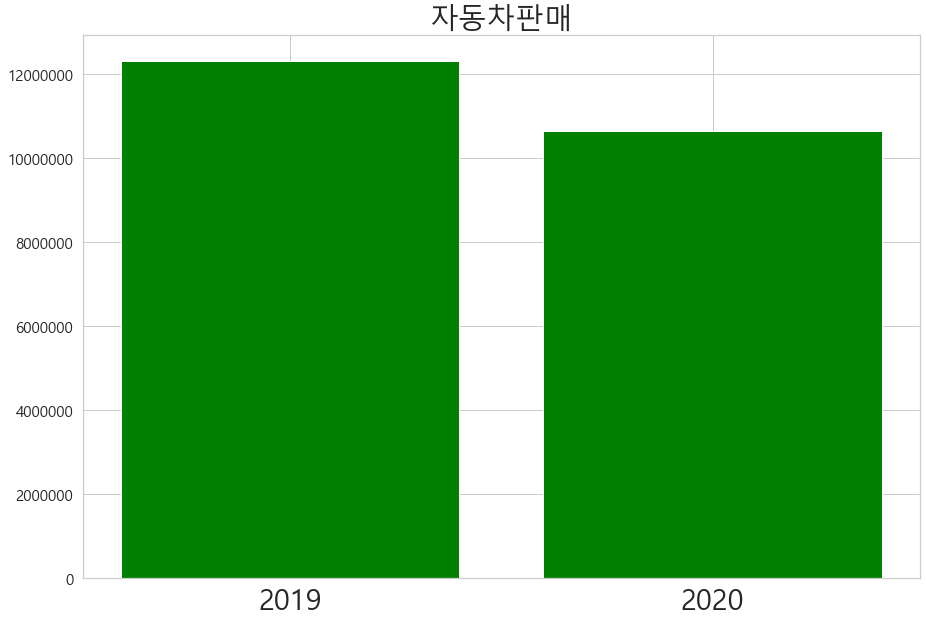

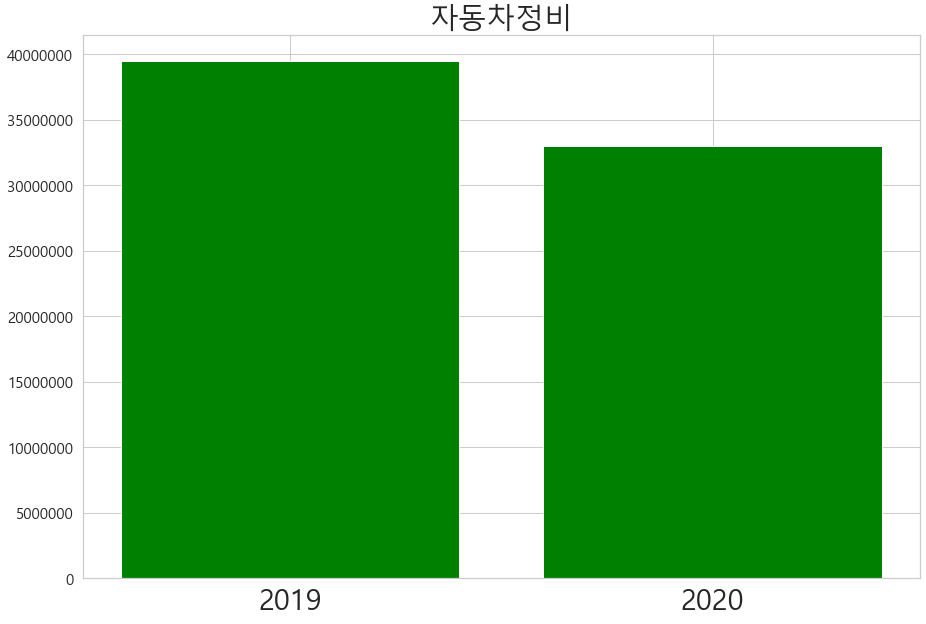

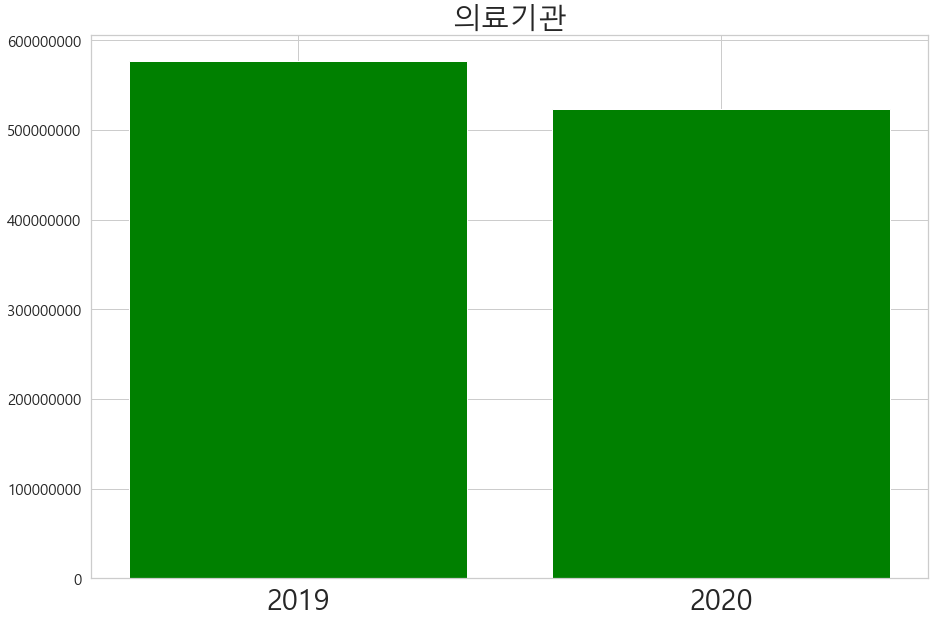

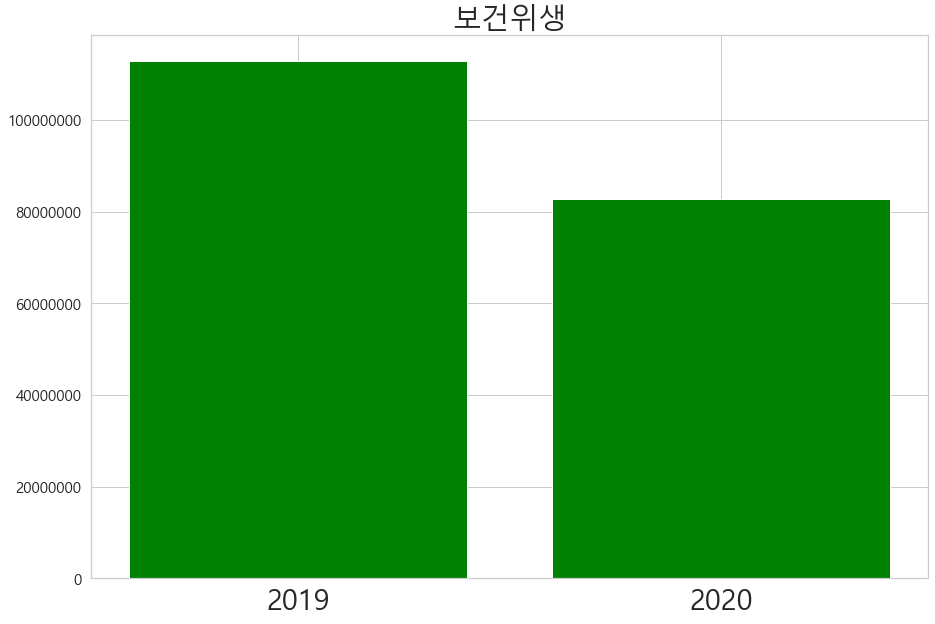

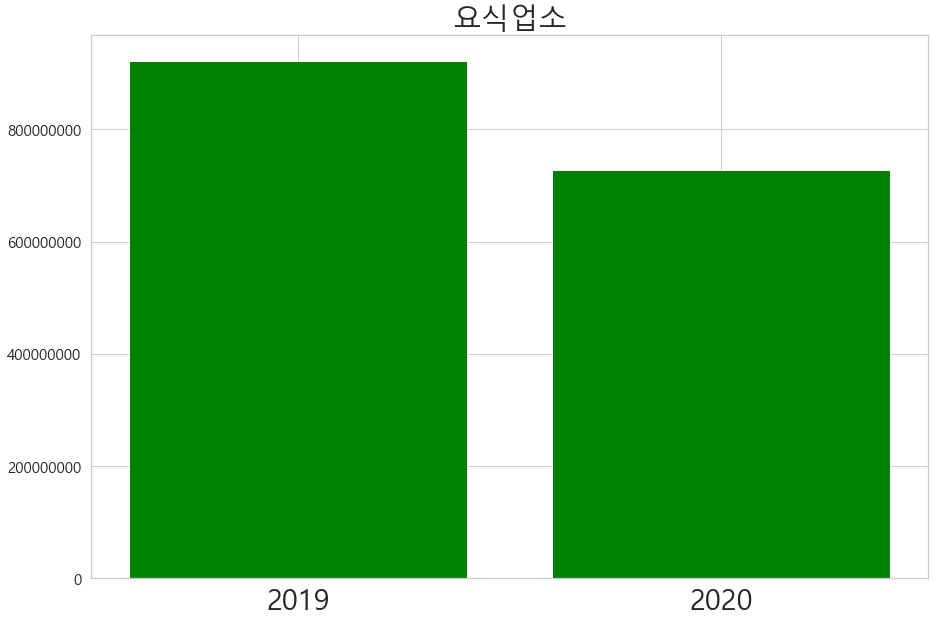

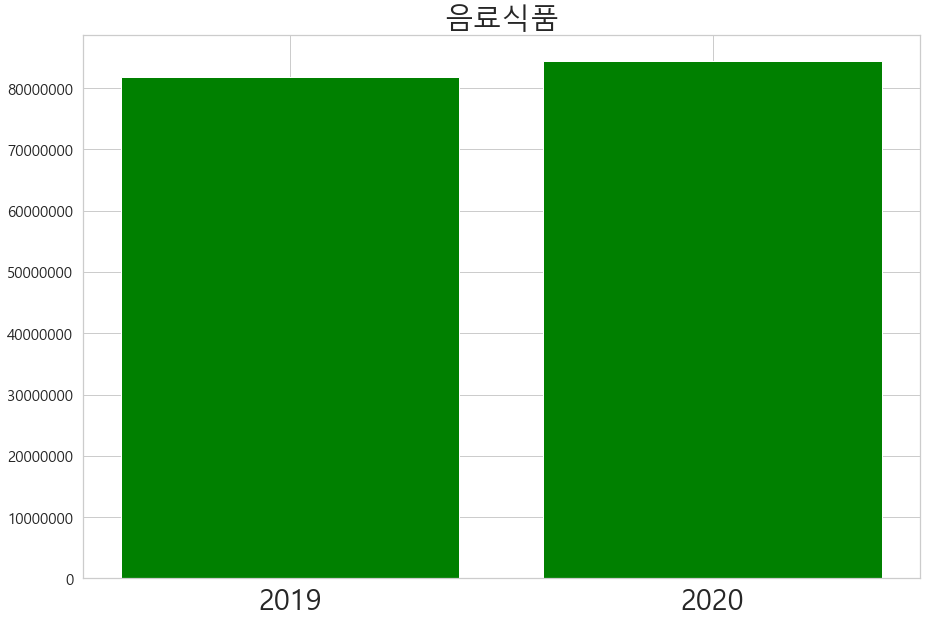

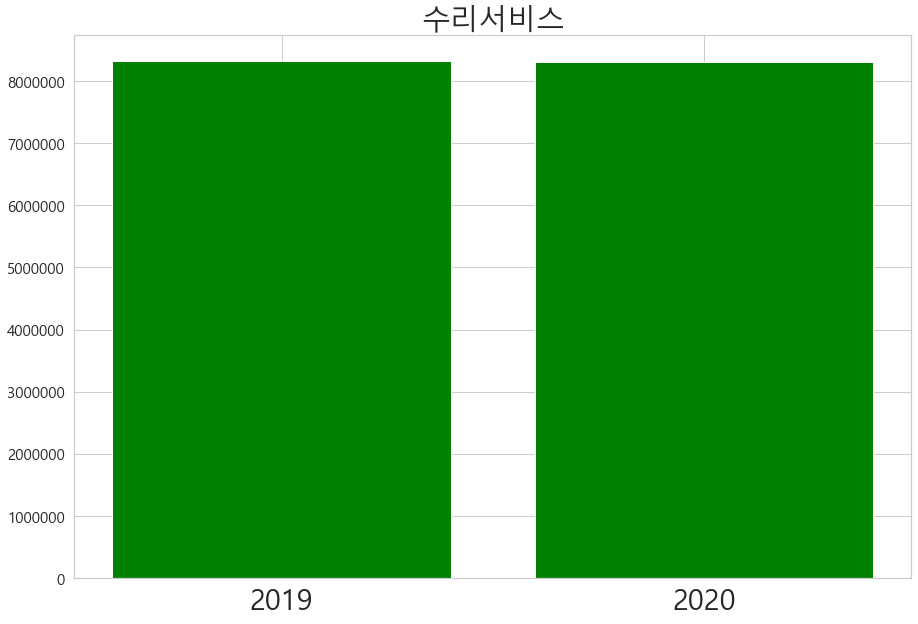

In [182]:
CODES= sh_gb2.INDUSTRY_CODE.unique()

for code in CODES:
    plt.bar(['2019','2020'], sh_gb2[sh_gb2.INDUSTRY_CODE == code]['USE_AMT'], color='green')
    plt.title(sh['INDUSTRY_CODE_DICT'].get(code))
    plt.ticklabel_format(axis='y',style='plain')
    plt.show()

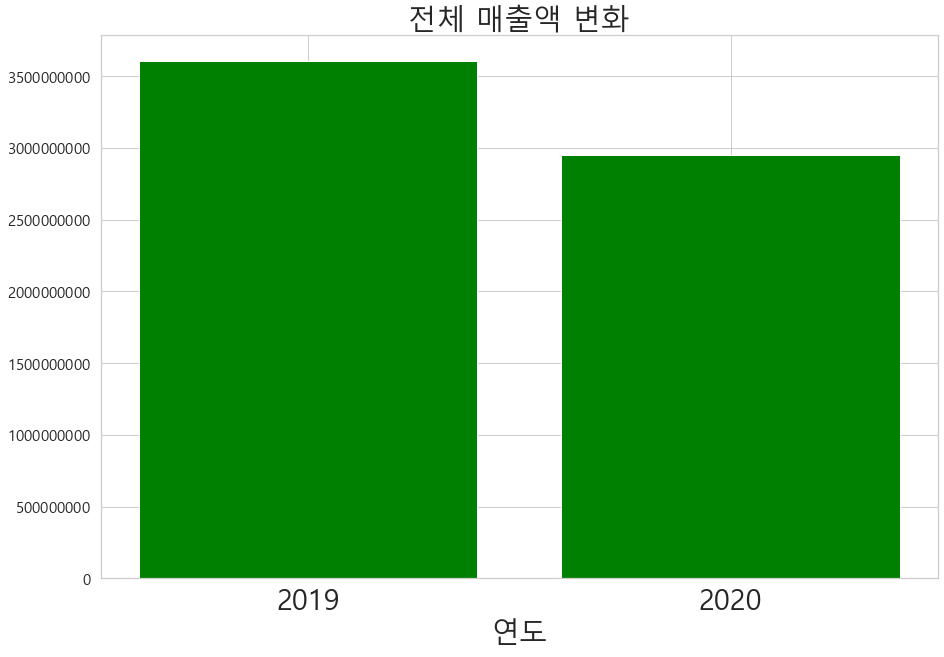

In [155]:
plt.figure(figsize= (15,10))
plt.bar(['2019','2020'], sh_resident_gb.sum()['USE_AMT'], color = 'green')
plt.title('전체 매출액 변화')
plt.xlabel('연도')
plt.ticklabel_format(axis='y',style='plain')
plt.show()

# SK_DATA

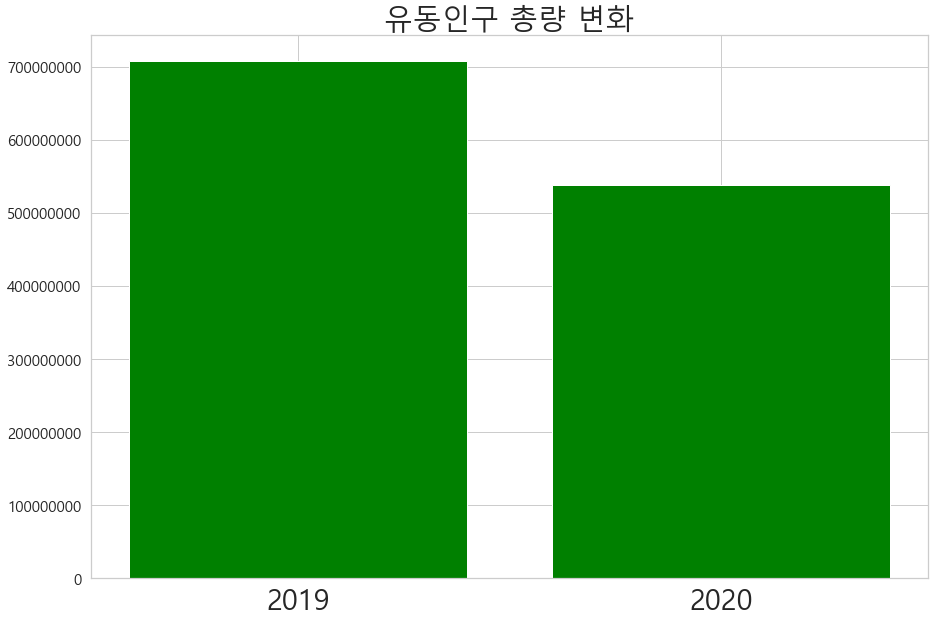

In [197]:
sk_age_gb= sk_age_data.groupby('YEAR')
plt.bar(['2019','2020'],sk_age_gb.sum().iloc[:,2:].sum(axis=1), color= 'green')
plt.ticklabel_format(axis='y', style= 'plain')
plt.title('유동인구 총량 변화')
plt.show()

In [204]:
sk_time_gb= sk_time_data.groupby('YEAR')
time_label= sk_time_gb.sum().iloc[:,2:].columns

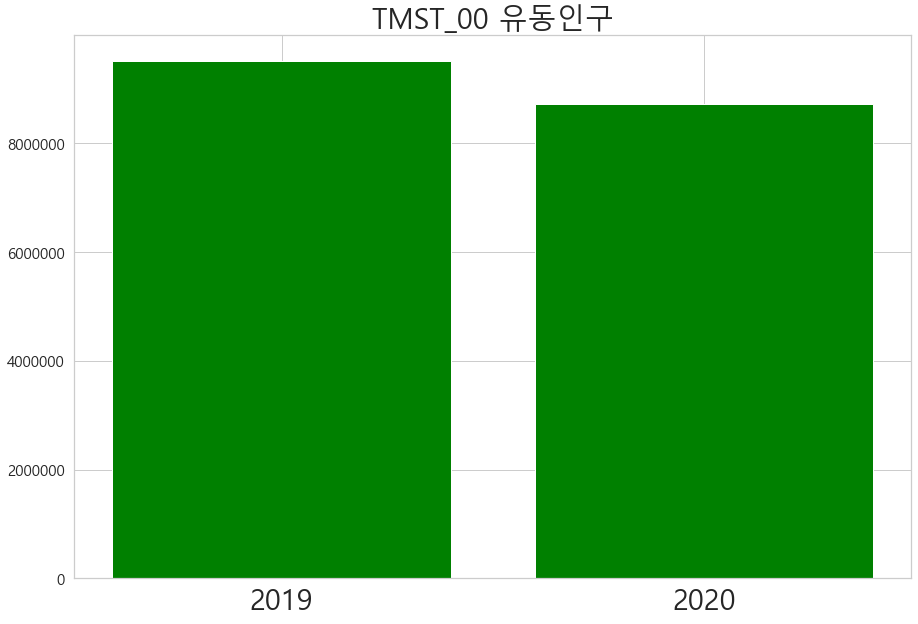

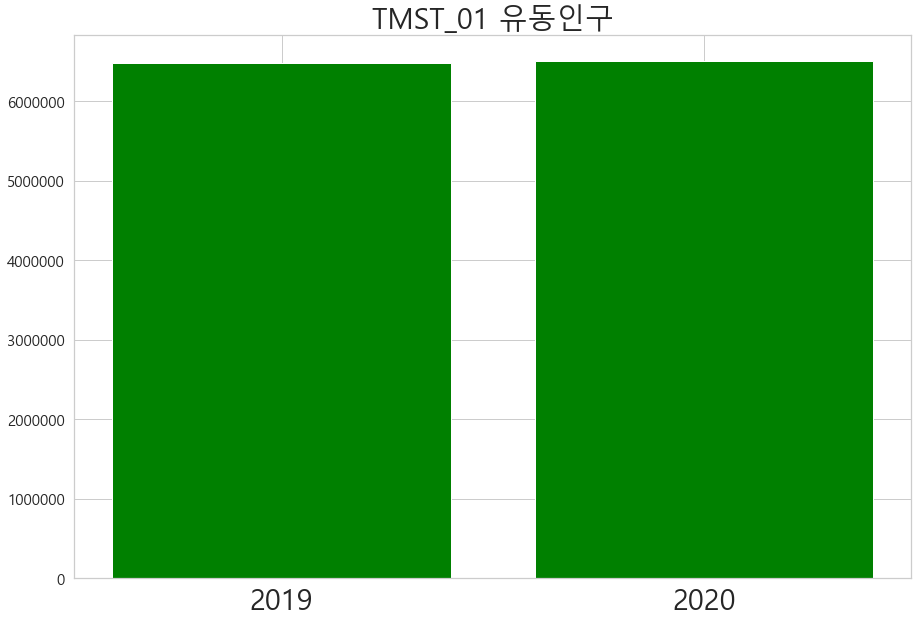

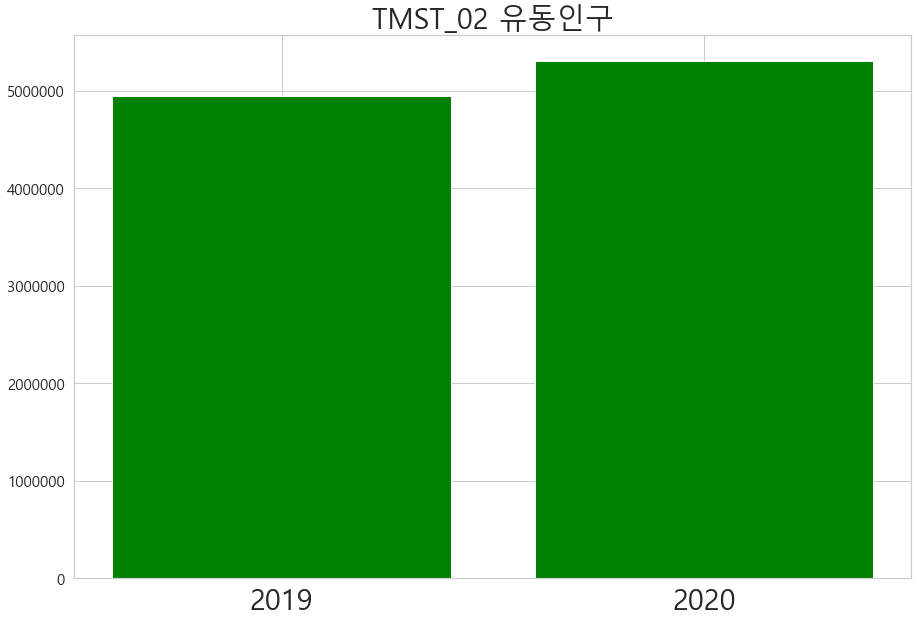

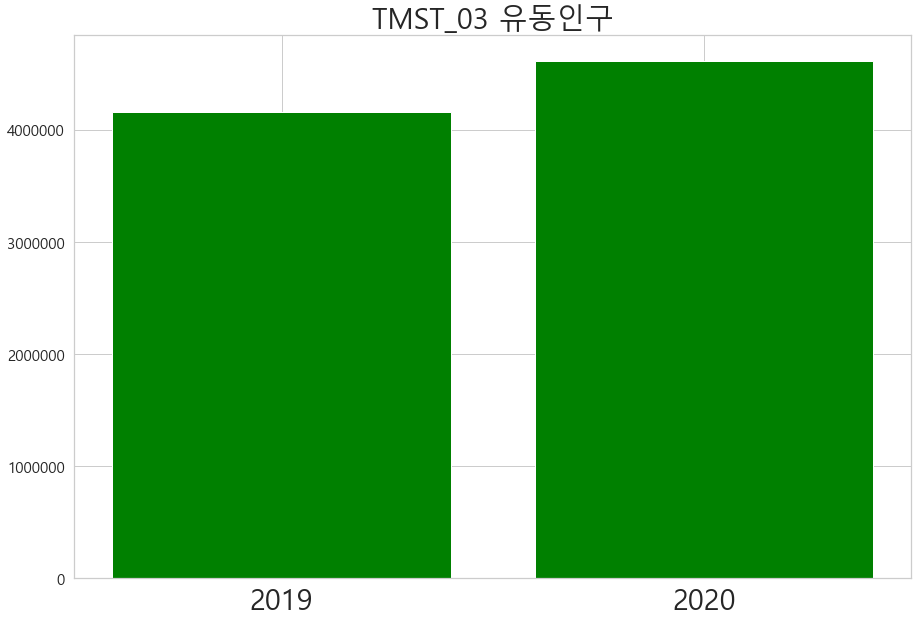

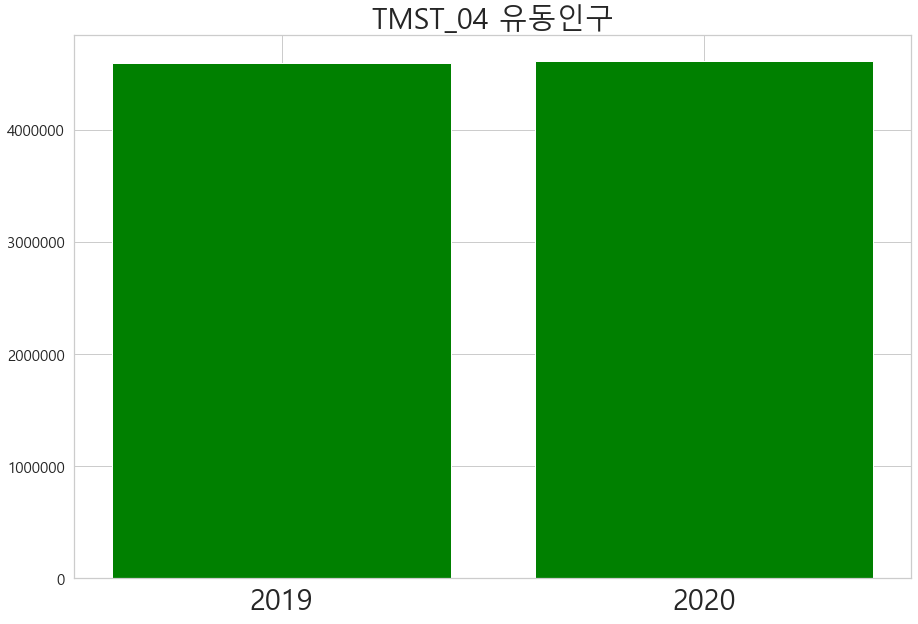

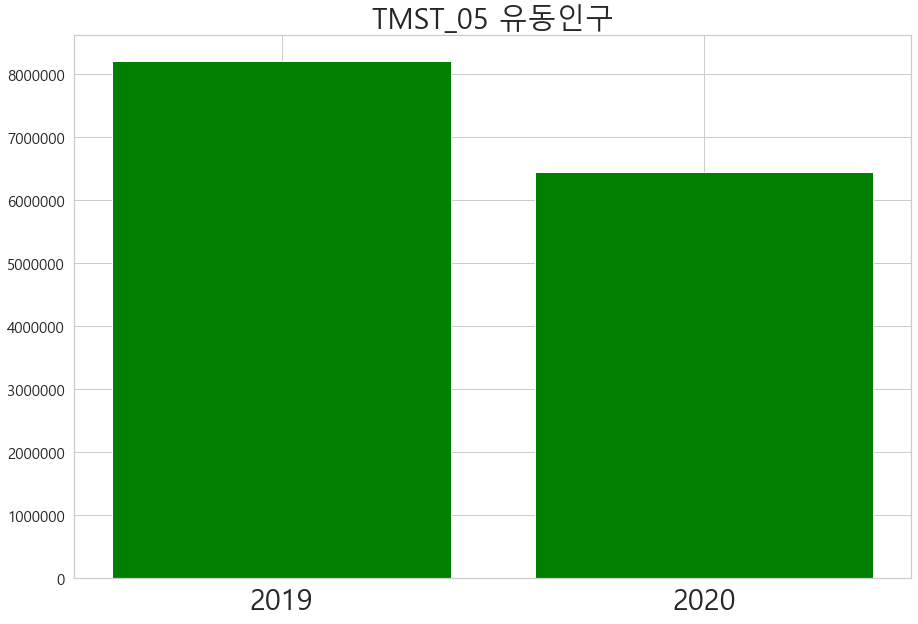

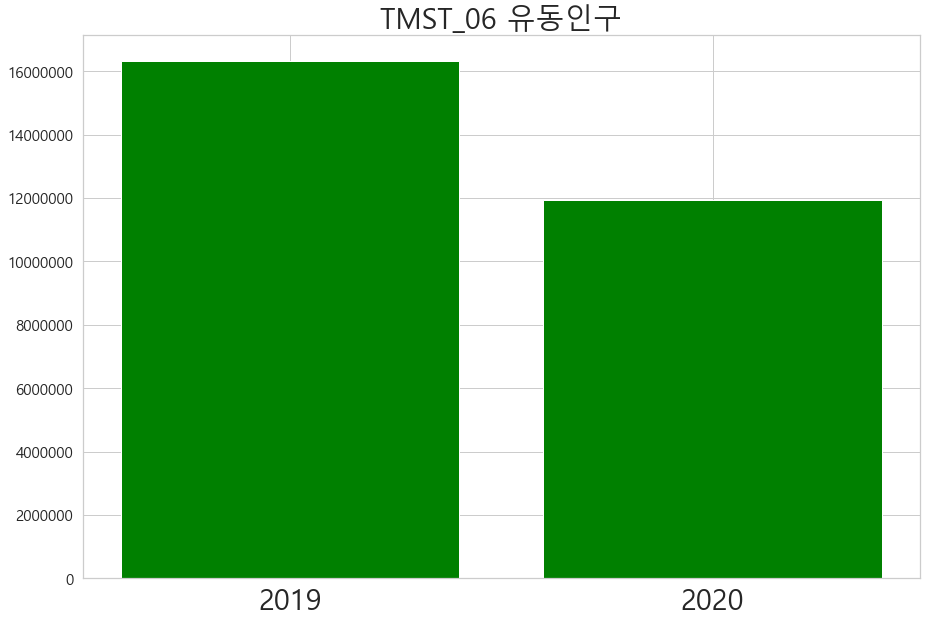

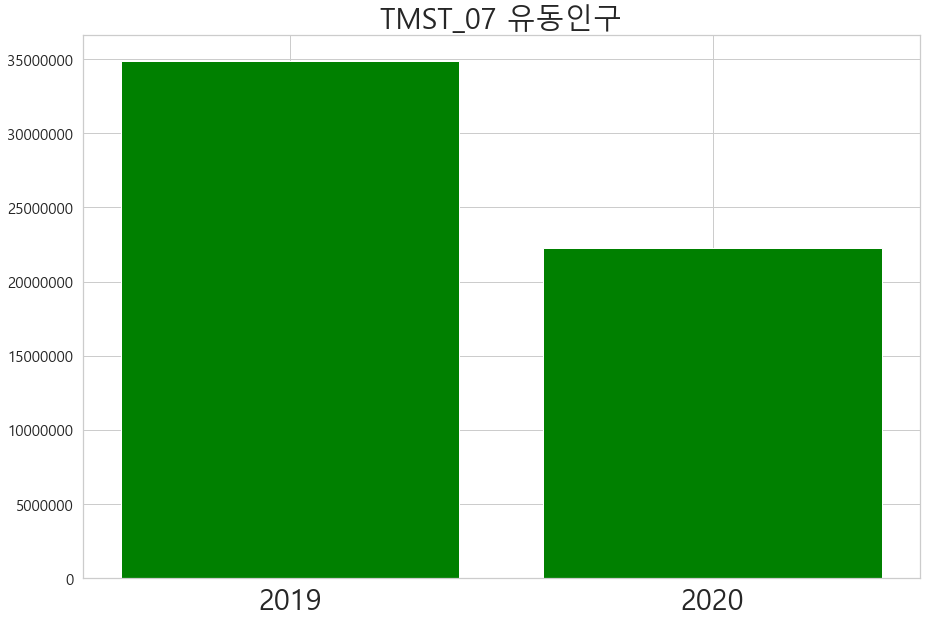

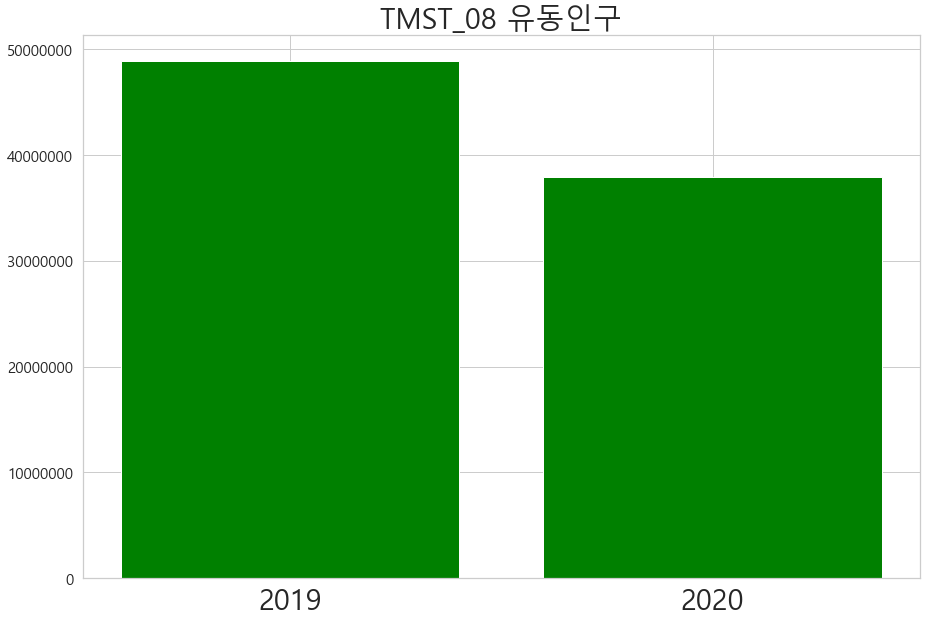

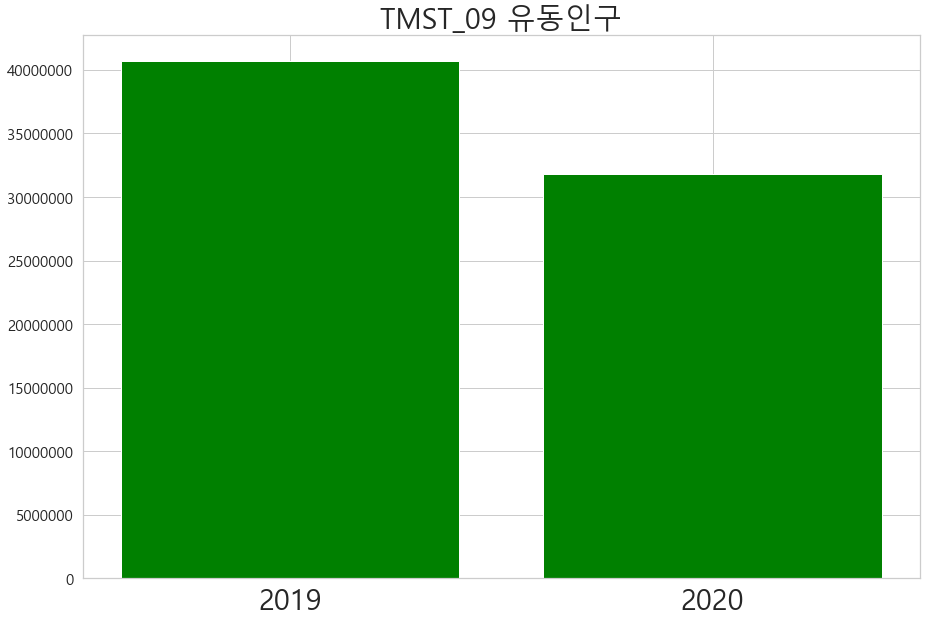

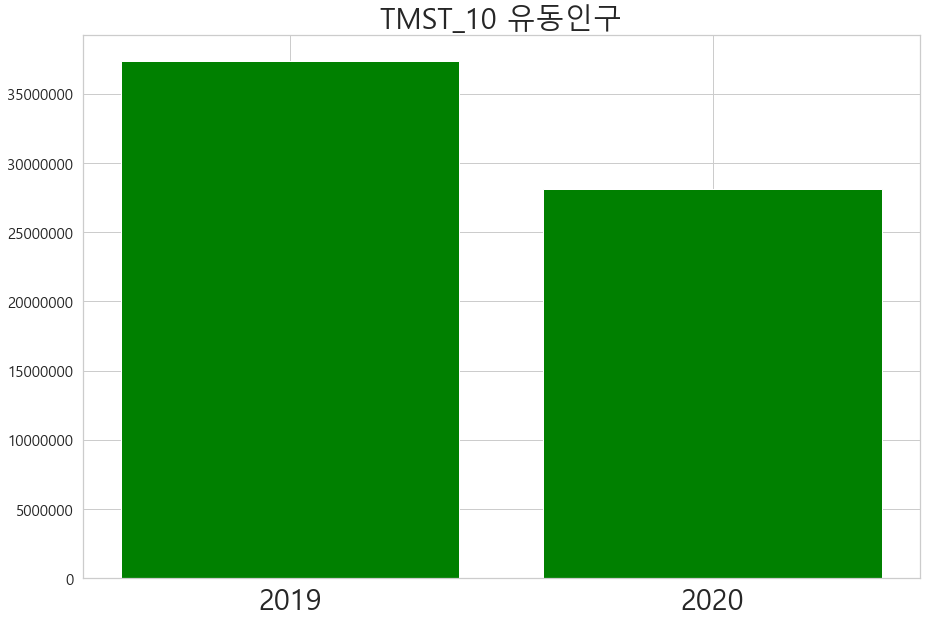

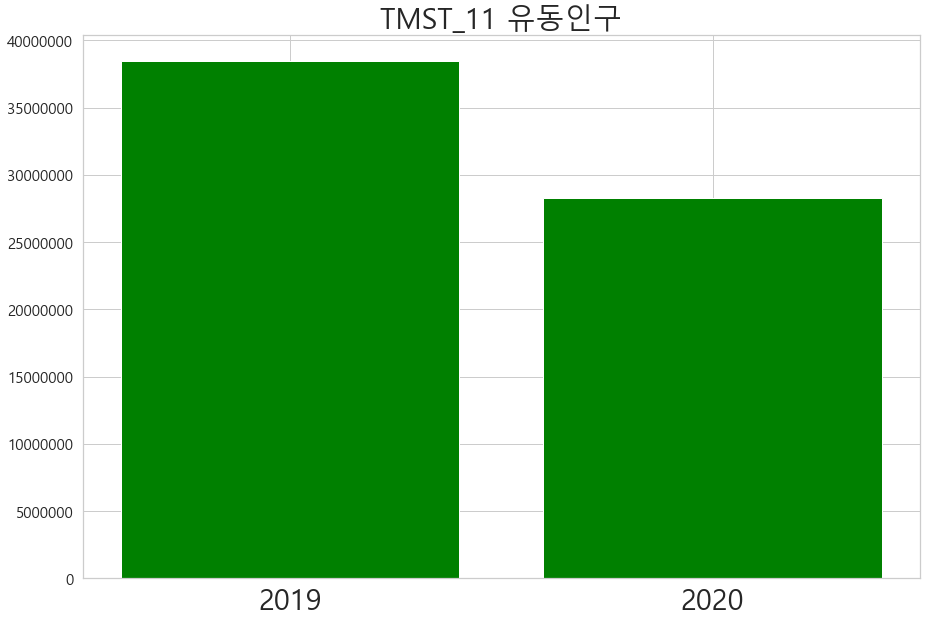

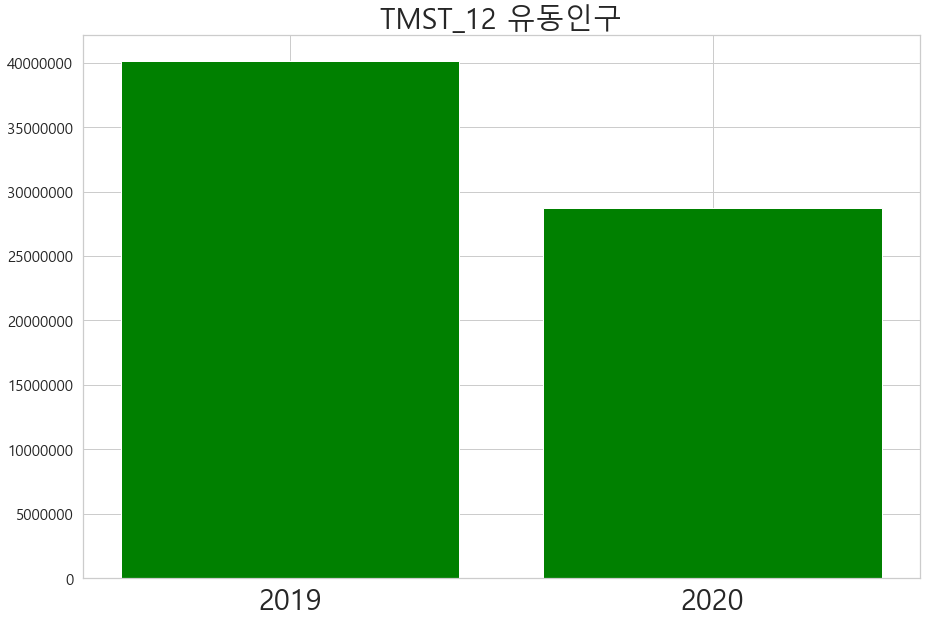

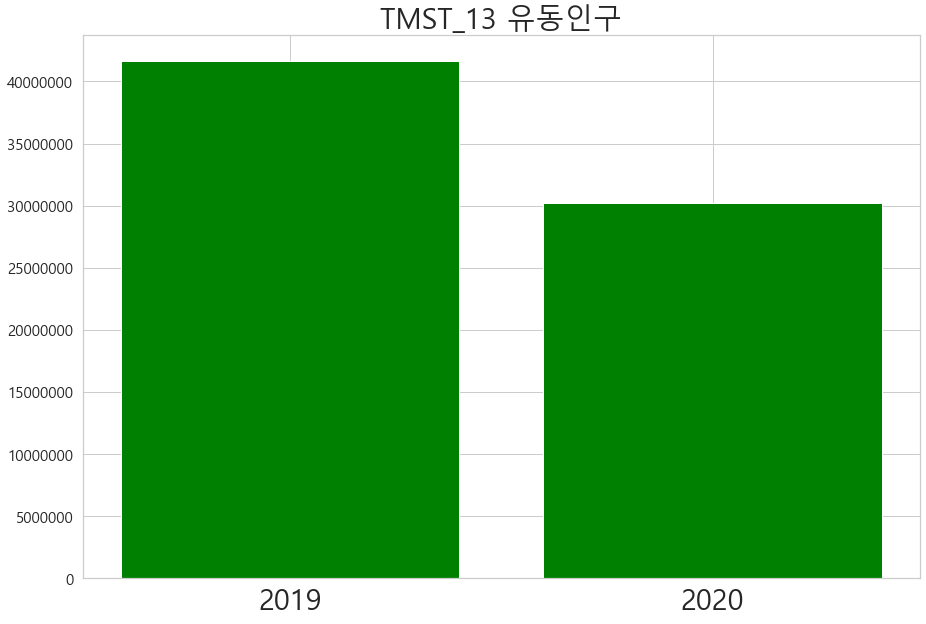

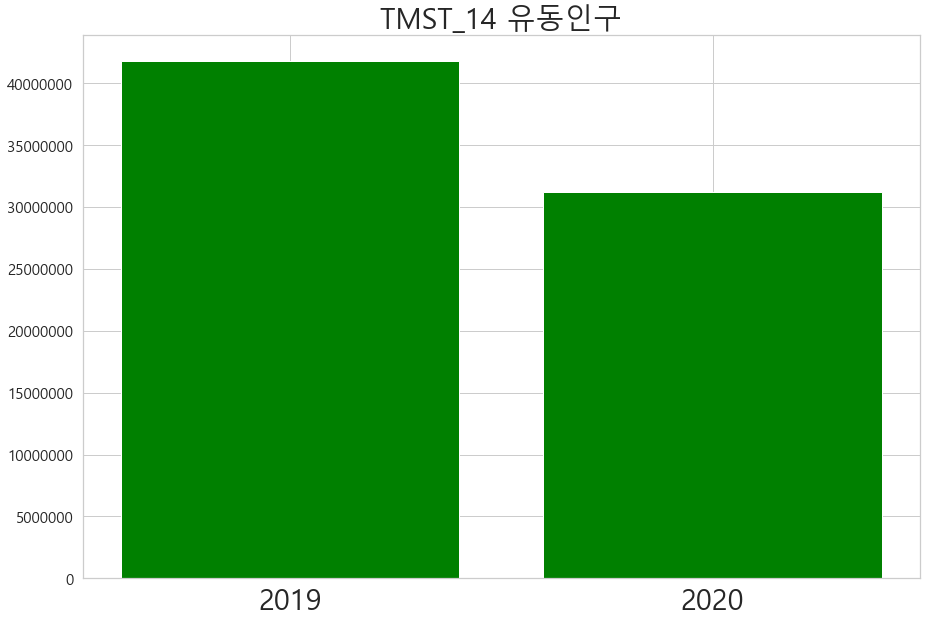

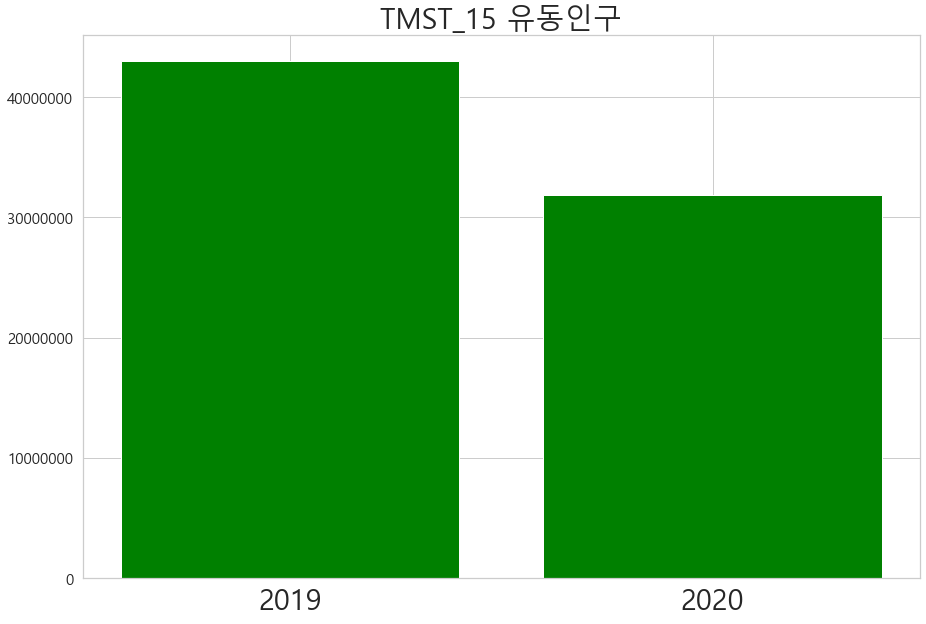

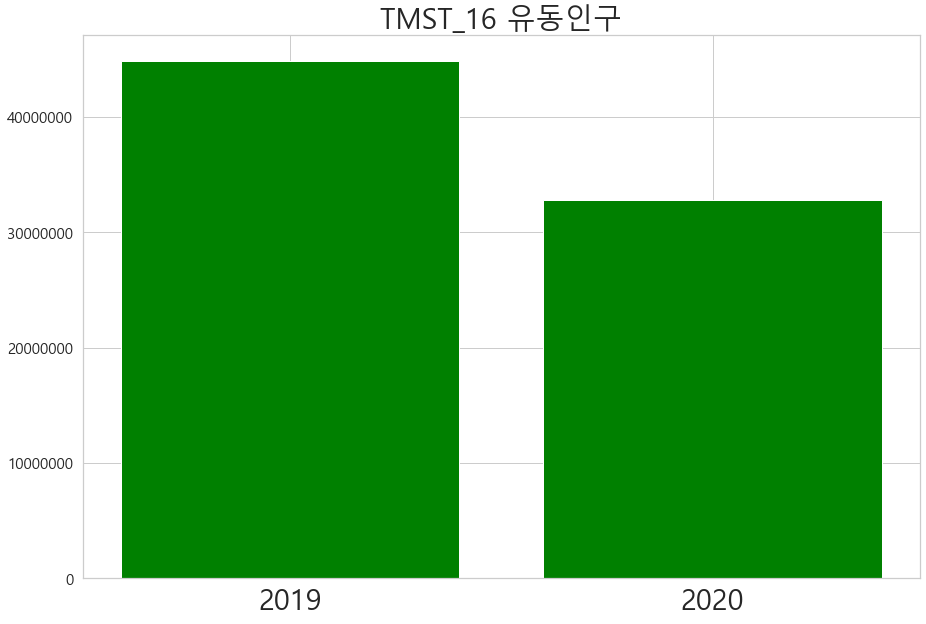

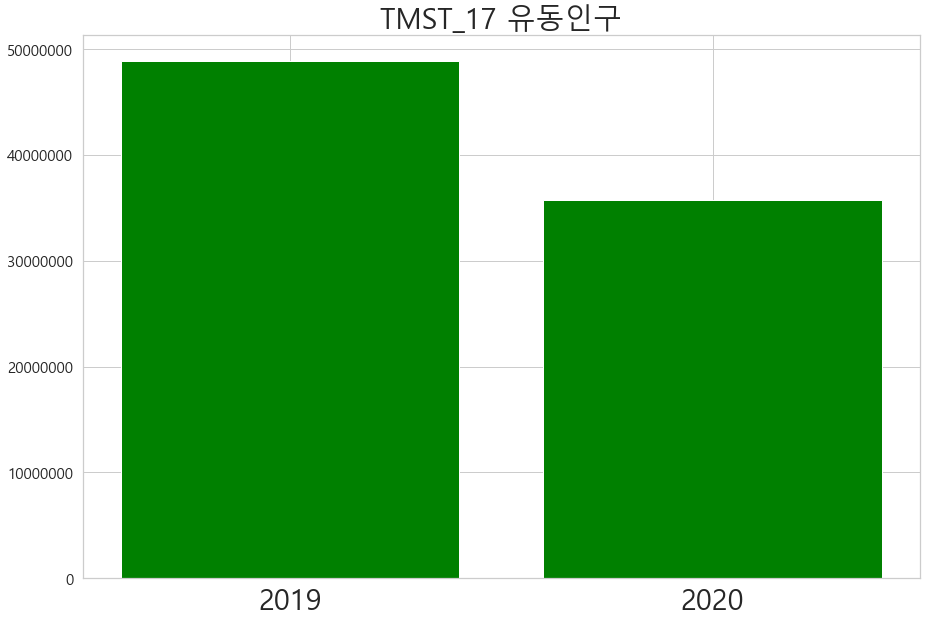

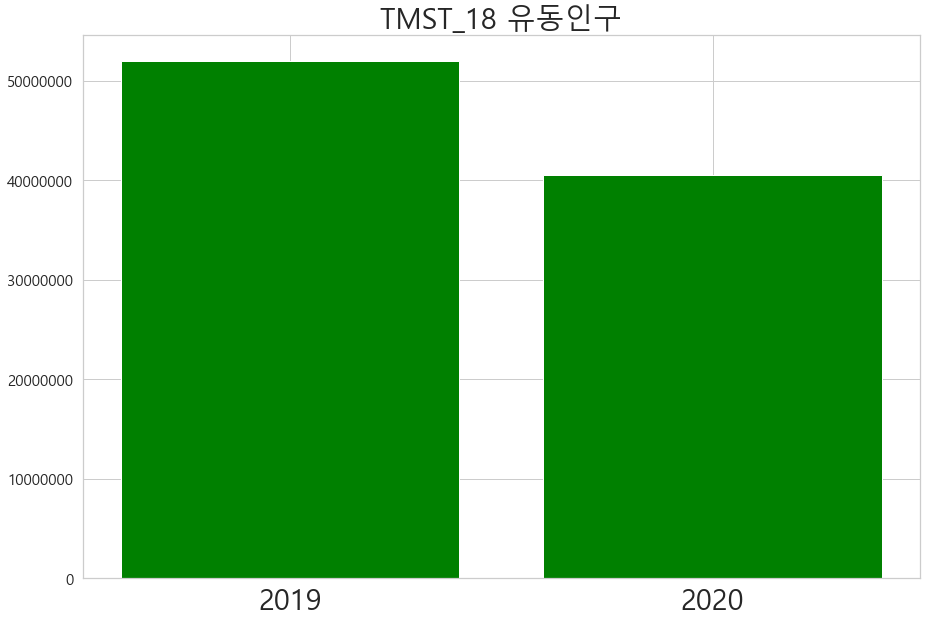

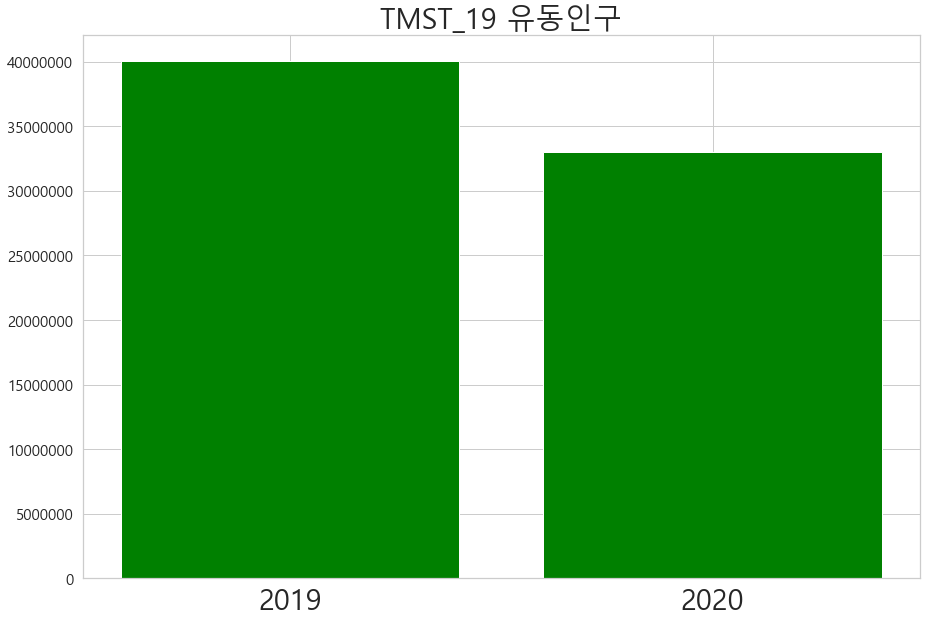

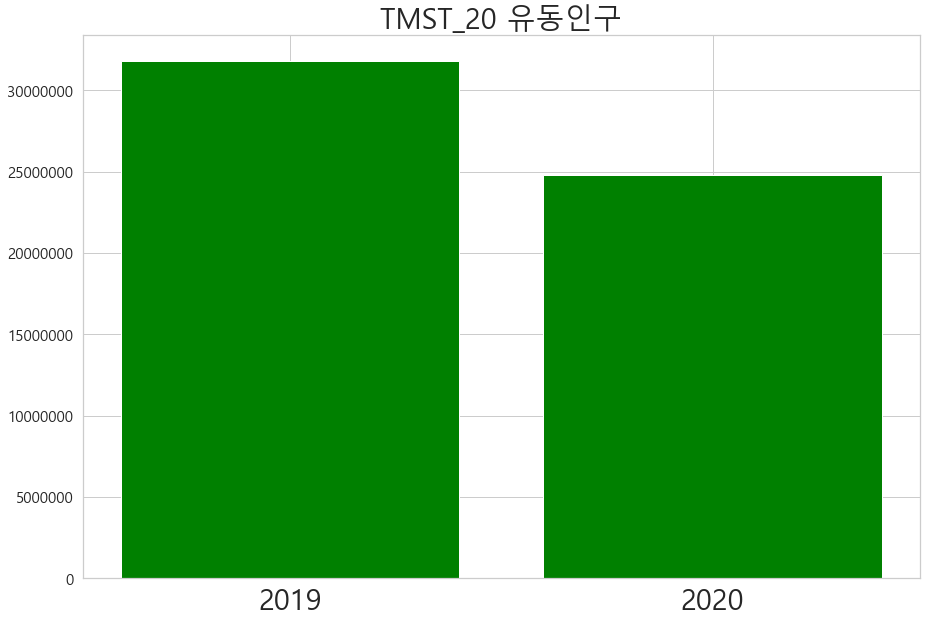

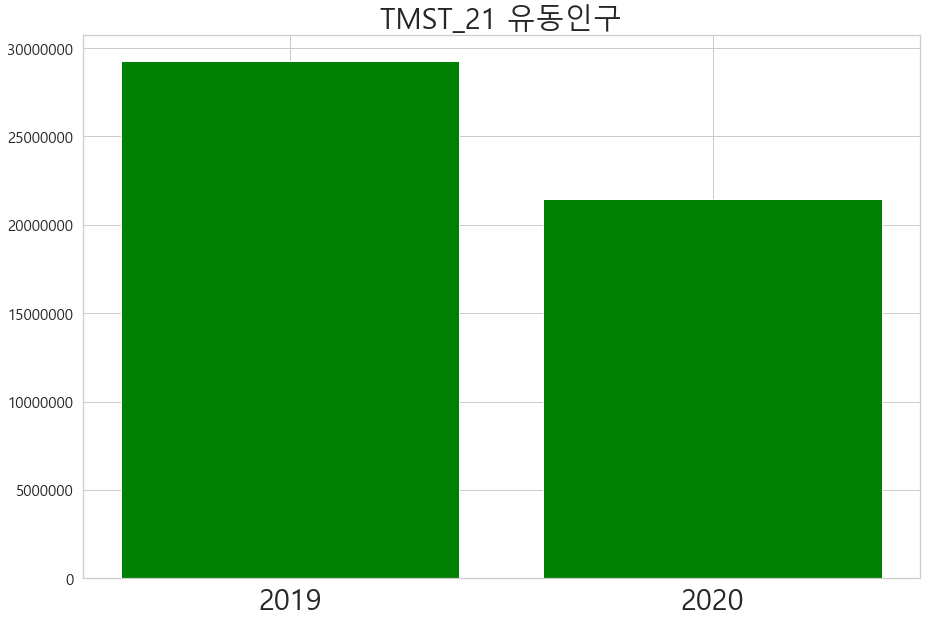

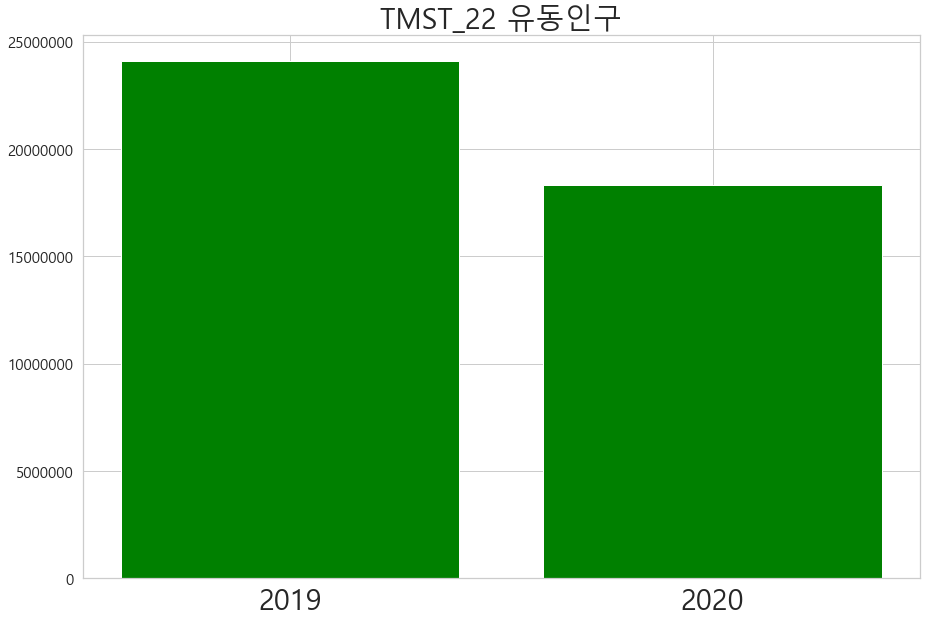

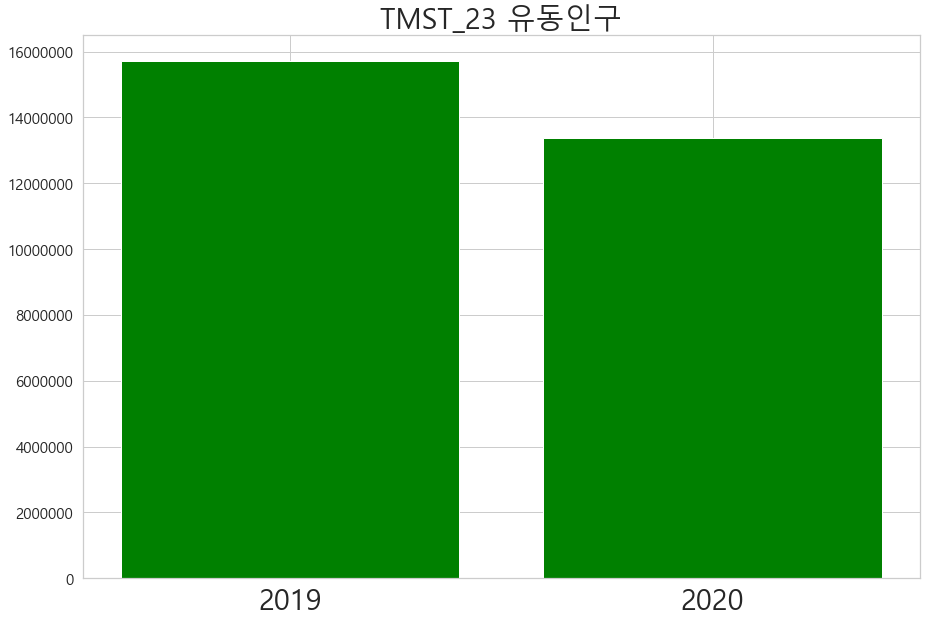

In [211]:
for label in time_label:
    plt.bar(['2019','2020'], sk_time_gb.sum()[label], color= 'green')
    plt.ticklabel_format(axis='y', style= 'plain')
    plt.title(str(label) + ' 유동인구')
    plt.show()

In [230]:
sk_time_gb.sum()['TMST_17']

YEAR
2019    48908710.67
2020    35694729.69
Name: TMST_17, dtype: float64

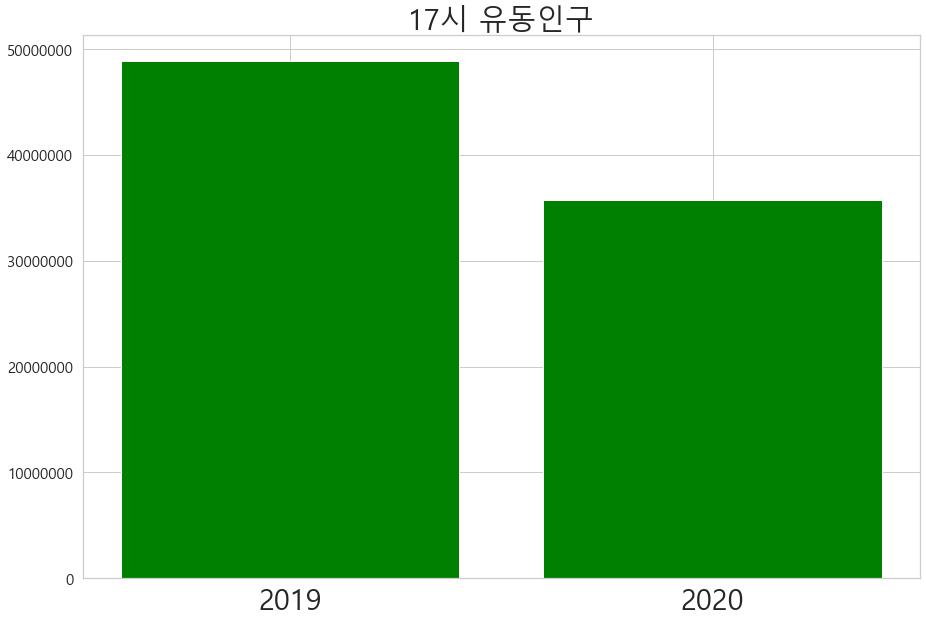

In [229]:
plt.bar(['2019','2020'], sk_time_gb.sum()['TMST_17'], color= 'green')
plt.ticklabel_format(axis='y', style= 'plain')
plt.title('17시 유동인구')
plt.show()